In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv('result.csv')
df

,text,date,score,Month
0,Our concern is that if ANY country is allowed ...,2024-04,1,4
1,Starship = Hope,2024-04,0,4
2,One year since first flight test of Starship. ...,2024-04,1,4
3,The eSafety Commissioner of Australia demanded...,2024-04,0,4
4,That is exactly the issue. Should the eSafet...,2024-04,0,4
...,...,...,...,...
115,NPR has become a hard left propaganda machine ...,2024-04,0,4
116,FSD Supervised continues to improve with every...,2024-04,0,4
117,Interesting series about a potentially good fu...,2024-04,0,4
118,United States laws prevent 𝕏 from participatin...,2024-04,0,4


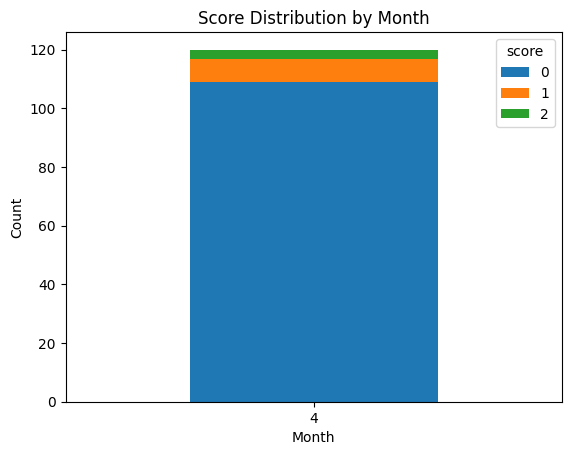

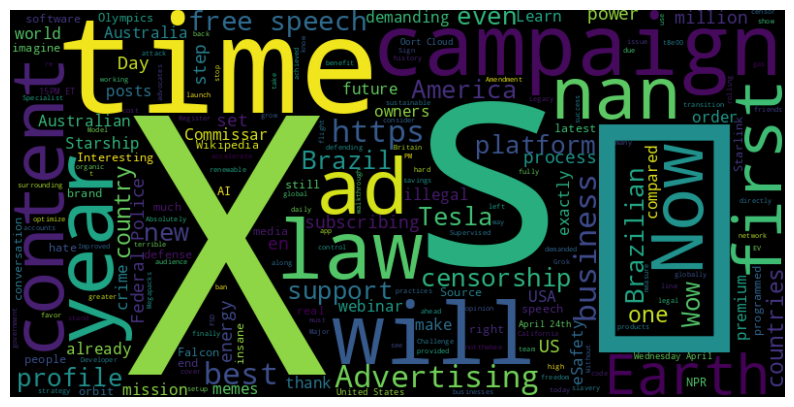

In [5]:
grouped = df.groupby(['Month', 'score']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Score Distribution by Month')
plt.xticks(rotation=0)
plt.legend(title='score')
plt.show()

# Concatenate all text data in the dataframe
text_data = ' '.join(df['text'].astype(str))

wordcloud = WordCloud(width=800, height=400).generate(text_data)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
import io
import base64
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

# Convert the image to a base64-encoded string
image_base64 = base64.b64encode(buffer.getvalue()).decode()
plt.close()  # Close the plot to release memory

print(image_base64)

iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAIyUlEQVR4nO3WMQEAIAzAMMC/5+ECjiYKenbPzCwAADLO7wAAAN4ygAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAAQIwBBACIMYAAADEGEAAgxgACAMQYQACAGAMIABBjAAEAYgwgAECMAQQAiDGAAAAxBhAAIMYAAgDEGEAAgBgDCAAQYwABAGIMIABAjAEEAIgxgAAAMQYQACDGAAIAxBhAAIAYAwgAEGMAAQBiDCAA

In [7]:
# dont forgot to run this part use in backend!
import dill
def visualization():
    import matplotlib
    import io
    import base64
    import os
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    matplotlib.use('agg')

    base_dir = "textback"
    models_folder = "models"
    csv_path = "result.csv"

    result_csv = os.path.join(base_dir, models_folder, csv_path)

    df = pd.read_csv(result_csv)
    grouped = df.groupby(['Month', 'score']).size().unstack(fill_value=0)

    grouped.plot(kind='bar', stacked=True)
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title('Score Distribution by Month')
    plt.xticks(rotation=0)
    plt.legend(title='score')
    plt.show()

    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)

    # Convert the image to a base64-encoded string
    image_base64 = base64.b64encode(buffer.getvalue()).decode()
    plt.close()  # Close the plot to release memory

    return image_base64

with open('../backend/textback/models/visualization.pkl', 'wb') as f:
    dill.dump(visualization, f)

In [8]:
visualization()

FileNotFoundError: [Errno 2] No such file or directory: 'textback/models/result.csv'